**PRACTICA 6**

Sergio González Martínez

In [226]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import collections


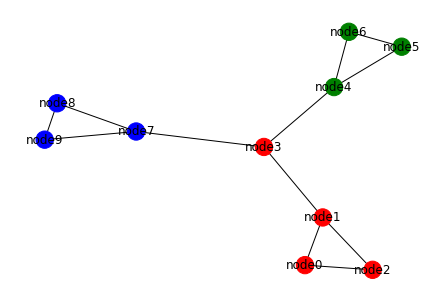

In [227]:

grafo=nx.Graph()
colorMap=[]
edges=[ ("node0","node1"),
        ("node0","node2"),
        ("node1","node3"), 
        ("node1","node2"), 
        ("node3","node7"),     
        ("node4","node3"),
        ("node4","node5"),
        ("node4","node6"),
        ("node5","node6"),
        ("node7","node8"),
        ("node7","node9"),
        ("node8","node9")
]
for x in range(10):
    nodoName="node{0}".format(x)
    if x<4:
        colorMap.append("red")
    elif x>=4 and x<7:
        colorMap.append("green")
    else:
        colorMap.append("blue")
    grafo.add_node(nodoName)
grafo.add_edges_from(edges)
pos = nx.spring_layout(grafo, k=0.15, iterations=10)
nx.draw(grafo,pos,with_labels=True, node_color =colorMap)

In [228]:
particionComunidadPorNodo=[{"node0"},{"node1"},{"node2"},{"node3"},{"node4"},{"node5"},{"node6"},{"node7"},{"node8"},{"node9"}]
particionComunidadColores=[{"node0","node1","node2","node3"},{"node4","node5","node6"},{"node7","node8","node9"}]
particion1SolaComunidad=[{"node0","node1","node2","node3","node4","node5","node6","node7","node8","node9"}]
def getModularidad(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for group in partition:
        s_C = sum(G.degree(n, weight='weight') for n in group)
        C = G.subgraph(group)
        W_C = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_C/W - (s_C / (2 * W))**2
    
    return summation

print("Modularidad:",getModularidad(grafo,particion1SolaComunidad)," para una sola comunidad")
print("Modularidad:",getModularidad(grafo,particionComunidadColores)," para las comunidades en colores")
print("Modularidad:",getModularidad(grafo,particionComunidadPorNodo)," cuando cada nodo es una comunidad")


Modularidad: 0.0  para una sola comunidad
Modularidad: 0.4895833333333332  para las comunidades en colores
Modularidad: -0.10416666666666667  cuando cada nodo es una comunidad


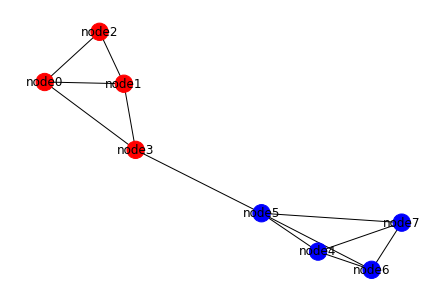

In [229]:
grafo=nx.Graph()
colorMap=[]
edges=[ ("node0","node1"),
        ("node0","node2"),
        ("node0","node3"), 
        ("node1","node2"), 
        ("node1","node3"),     
        ("node3","node5"),
        ("node5","node4"),
        ("node5","node6"),
        ("node5","node7"),
        ("node6","node4"),
        ("node6","node7"),
        ("node7","node4")
]
for x in range(8):
    nodoName="node{0}".format(x)
    if x<4:
        colorMap.append("red")
    else:
        colorMap.append("blue")
    grafo.add_node(nodoName)
grafo.add_edges_from(edges)
pos = nx.spring_layout(grafo, k=0.15, iterations=10)
nx.draw(grafo,pos,with_labels=True, node_color =colorMap)

In [230]:
particionComunidadPorNodo=[{"node0"},{"node1"},{"node2"},{"node3"},{"node4"},{"node5"},{"node6"},{"node7"}]
particionComunidadColores=[{"node0","node1","node2","node3"},{"node4","node5","node6","node7"}]
particion1SolaComunidad=[{"node0","node1","node2","node3","node4","node5","node6","node7"}]
print("Modularidad:",getModularidad(grafo,particion1SolaComunidad)," para una sola comunidad")
print("Modularidad:",getModularidad(grafo,particionComunidadColores)," para las comunidades en colores")
print("Modularidad:",getModularidad(grafo,particionComunidadPorNodo)," cuando cada nodo es una comunidad")

Modularidad: 0.0  para una sola comunidad
Modularidad: 0.41319444444444453  para las comunidades en colores
Modularidad: -0.1284722222222222  cuando cada nodo es una comunidad


In [231]:
G_karate = nx.karate_club_graph()
# Find the communities
communities = sorted(nx.algorithms.community.greedy_modularity_communities(G_karate), key=len, reverse=True)
print(communities)
# Count the communities
print(f"The karate club has {len(communities)} communities.")

[frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 16, 19, 4, 5, 6, 10, 11})]
The karate club has 3 communities.


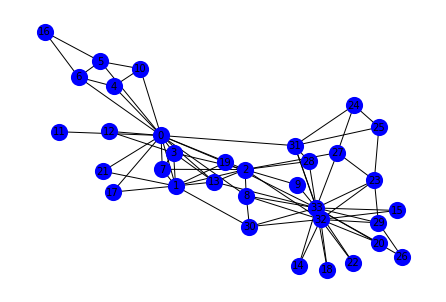

In [232]:
karate_pos = nx.spring_layout(G_karate)
options = {
    "font_size": 10,
    "node_size": 200,
    "node_color": "blue",
    "edgecolors": "blue",
    "linewidths": 3,
    "width": 1,
}
nx.draw(G_karate,karate_pos,with_labels=True, **options)

In [233]:
def getParticiones(grafo):    
    #Empirical Partition
    # print(G_karate.nodes(data=True))

    ## Obtengo los grupos del [(0, {'club': 'Mr. Hi'}), ....] , en este caso 'la key club'
    setGrupos=set()
    for key in grafo.nodes:
        for group in grafo.nodes[key]:
            setGrupos.add(group)
    empirical_groups={}

    for node in grafo.nodes():
        empirical_groups[G_karate.nodes[node][list(setGrupos)[0]]]=set()
    # for nodo in grafo.nodes:
    #     setGrupos.add(grafo.nodes[nodo]['club'])
    # print(setGrupos)

    for node in G_karate.nodes:
        club = G_karate.nodes[node][list(setGrupos)[0]]  #club es el campo donde se almacena el club
        empirical_groups[club].add(node)
    empirical_partition = list(empirical_groups.values())
    return empirical_partition
print(getParticiones(G_karate))

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]


In [234]:
print("La modularidad de las particiones es: ",getModularidad(G_karate,getParticiones(G_karate)))

La modularidad de las particiones es:  0.3582347140039447


In [235]:
# Descripcion del algoritmo
G_karate = nx.karate_club_graph()
# Betweenes entre todos los enlaces
btw_centrality = nx.edge_betweenness(G_karate)
# Eliminamos en que mas btw tiene
enlaceMaxValor = max(G_karate.edges(), key = btw_centrality.get)
G_karate.remove_edge(*enlaceMaxValor) # *most_valueble_edge = enlaceMaxValor[0], enlaceMaxValor[1]
# Creamos la particion
particiones = list(nx.connected_components(G_karate))

In [236]:
# Girvan-Newman Algorithm

def girvan_newman(G):
    F = G.copy()
    secuenciasParticiones = []
    for _ in range(F.number_of_edges()):
        btw_centrality = nx.edge_betweenness(F)
        enlaceMaxValor = max(F.edges(), key = btw_centrality.get)
        F.remove_edge(*enlaceMaxValor)
        particiones = list(nx.connected_components(F))
        secuenciasParticiones.append(particiones)
        
    modularity_sequence = [getModularidad(G, particiones) for particiones in secuenciasParticiones]
    
    return secuenciasParticiones, modularity_sequence

In [237]:
G_karate = nx.karate_club_graph()
partition_sequence, modularity_sequence = girvan_newman(G_karate)

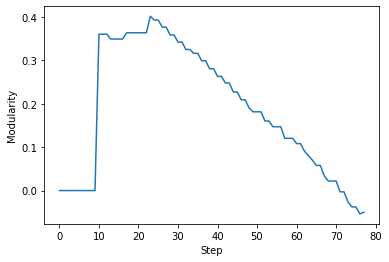

In [238]:
# Modularity Plot
plt.plot(modularity_sequence)
plt.ylabel('Modularity')
plt.xlabel('Step')
plt.show()

In [239]:
best_partition, best_modularity = max(zip(partition_sequence,modularity_sequence), key=lambda x:x[1])
print("Particion con la mayor modularidad: ")
print("Particion: ", best_partition)
print("Modularidad: ", best_modularity)

Particion con la mayor modularidad: 
Particion:  [{0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}]
Modularidad:  0.40129848783694944


In [240]:
# Mapa de la particion
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

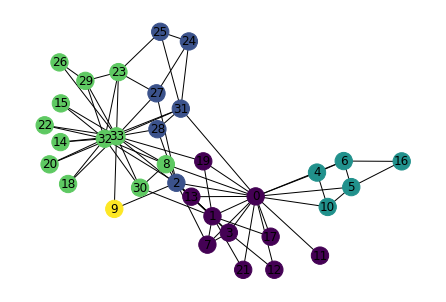

In [241]:
# Visualizacion de la red
mejor_particion_map = create_partition_map(best_partition)
mejor_particion_colores = [mejor_particion_map[node] for node in G.nodes()]

nx.draw(G_karate, node_color=mejor_particion_colores, with_labels=True)